# Python

### Instalación de Librerias

In [1]:
# INSTALACION DE LIBRERIAS

!pip install yfinance --upgrade --no-cache-dir
!pip install pandas-datareader --upgrade --no-cache-dir
!pip install plotly --upgrade --no-cache-dir
!pip install keras-tuner --upgrade --no-cache-dir
!pip install ipykernel
!pip install --upgrade numpy
!pip install --upgrade scikit-learn
!pip install --upgrade skforecast==0.11.0


# IMPORTE DE LIBRERIAS
import tensorflow as tf

#univariate one step problem with lstm
from numpy import array
import numpy as np
import keras_tuner as kt
from tensorflow.keras.models import Sequential # Import from tensorflow.keras
from tensorflow.keras.layers import Dense,  LSTM, Dropout # Import from tensorflow.keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # Import from tensorflow.keras
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Estas son paqueterías complementarias para la descarga de datos financieros
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

#Plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.3.2 requires numpy<2.0,>=1.17.3, but you have numpy 2.2.5 which is incompatible.
skforecast 0.11.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.5 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 whic

### Importe de datos Financieros

In [161]:
start = '2016-05-01'
end = '2018-01-28'

meta = yf.download("META", start='2016-05-01', end='2018-01-28')['Close'].dropna()

print(meta.head())
print(f"Tamaño del dataset {len(meta)}")

[*********************100%***********************]  1 of 1 completed

Ticker            META
Date                  
2016-05-02  118.013802
2016-05-03  116.879150
2016-05-04  117.506187
2016-05-05  117.257370
2016-05-06  118.929482
Tamaño del dataset 439


### Grafica de la serie

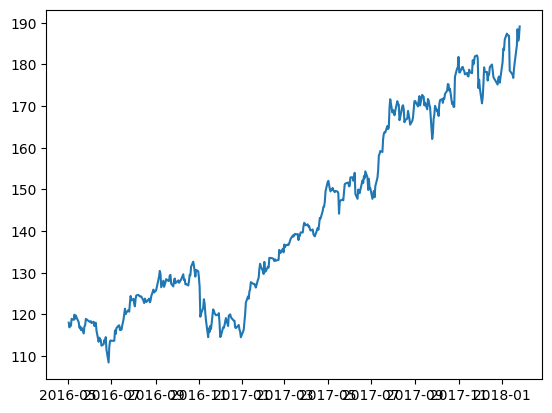

In [162]:
plt.plot(meta)

## Modelo LSTM

### Preparación de datos

In [163]:
#Ahora, pasamos el data frame a un objeto de tiempo de pandas.
dataindex= pd.to_datetime(meta.index)
dataindex

DatetimeIndex(['2016-05-02', '2016-05-03', '2016-05-04', '2016-05-05',
               '2016-05-06', '2016-05-09', '2016-05-10', '2016-05-11',
               '2016-05-12', '2016-05-13',
               ...
               '2018-01-12', '2018-01-16', '2018-01-17', '2018-01-18',
               '2018-01-19', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26'],
              dtype='datetime64[ns]', name='Date', length=439, freq=None)

In [164]:
#Ahora, a numpy array:
dt2= meta.to_numpy()
dt2

array([[118.01380157],
       [116.87915039],
       [117.50618744],
       [117.25737   ],
       [118.92948151],
       [118.6806488 ],
       [119.93475342],
       [118.95934296],
       [119.71577454],
       [119.24797821],
       [118.11332703],
       [116.7995224 ],
       [117.09812164],
       [116.26205444],
       [116.7995224 ],
       [115.42599487],
       [117.14787292],
       [117.33699036],
       [118.90957642],
       [118.81999969],
       [118.25267792],
       [118.2228241 ],
       [118.37210846],
       [117.91426849],
       [118.2327652 ],
       [117.20760345],
       [117.8346405 ],
       [118.00383759],
       [116.07295227],
       [113.41545868],
       [114.40083313],
       [114.06242371],
       [113.85340118],
       [112.48982239],
       [112.8381958 ],
       [113.84346008],
       [113.37566376],
       [114.54016876],
       [111.554245  ],
       [108.45883942],
       [112.17134094],
       [113.62448883],
       [113.743927  ],
       [113

In [165]:
#Y generamos un rearreglo de la dimensión del array a 1D, en los renglones (el -1 signigica que numpy calcula este número por nosotros).
close_data = dt2.reshape((-1,1))
close_data

array([[118.01380157],
       [116.87915039],
       [117.50618744],
       [117.25737   ],
       [118.92948151],
       [118.6806488 ],
       [119.93475342],
       [118.95934296],
       [119.71577454],
       [119.24797821],
       [118.11332703],
       [116.7995224 ],
       [117.09812164],
       [116.26205444],
       [116.7995224 ],
       [115.42599487],
       [117.14787292],
       [117.33699036],
       [118.90957642],
       [118.81999969],
       [118.25267792],
       [118.2228241 ],
       [118.37210846],
       [117.91426849],
       [118.2327652 ],
       [117.20760345],
       [117.8346405 ],
       [118.00383759],
       [116.07295227],
       [113.41545868],
       [114.40083313],
       [114.06242371],
       [113.85340118],
       [112.48982239],
       [112.8381958 ],
       [113.84346008],
       [113.37566376],
       [114.54016876],
       [111.554245  ],
       [108.45883942],
       [112.17134094],
       [113.62448883],
       [113.743927  ],
       [113

### Partición de datos en entrenamiento y prueba

In [166]:
#Especificamos primeramente el porcentaje del corte 95%
split_percent = 0.95
split = int(split_percent*len(close_data))

#Aplicamos dicha proporción a la definición de la parte de entrenamiento y de prueba.
close_train = close_data[:split]
close_test = close_data[split:]

date_train = dataindex[:split]
date_test = dataindex[split:]

In [167]:
# Visualuzacion de train
date_train

DatetimeIndex(['2016-05-02', '2016-05-03', '2016-05-04', '2016-05-05',
               '2016-05-06', '2016-05-09', '2016-05-10', '2016-05-11',
               '2016-05-12', '2016-05-13',
               ...
               '2017-12-11', '2017-12-12', '2017-12-13', '2017-12-14',
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22'],
              dtype='datetime64[ns]', name='Date', length=417, freq=None)

In [168]:
#imprimimos la longitud de ambos conjuntos de datos:
print(len(close_train))
print(len(close_test))

417
22


In [169]:
date_test

DatetimeIndex(['2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16', '2018-01-17', '2018-01-18',
               '2018-01-19', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

### Preprocesamiento

In [170]:
n_back = 10
train_generator = TimeseriesGenerator(close_train, close_train, length=n_back, batch_size=10)
test_generator = TimeseriesGenerator(close_test, close_test, length=n_back, batch_size=1)

In [171]:
# Podemos ver el número de muestras que se prepararán en los datos por el generador para esta serie
print('Samples: %d' % len(train_generator))
print('Samples: %d' % len(test_generator))

Samples: 41
Samples: 12


In [172]:
#Podríamos imprimir  los componentes de entrada
for i in range(len(train_generator)):
	x, y = train_generator[i]
	print('%s => %s' % (x, y))

[[[118.01380157]
  [116.87915039]
  [117.50618744]
  [117.25737   ]
  [118.92948151]
  [118.6806488 ]
  [119.93475342]
  [118.95934296]
  [119.71577454]
  [119.24797821]]

 [[116.87915039]
  [117.50618744]
  [117.25737   ]
  [118.92948151]
  [118.6806488 ]
  [119.93475342]
  [118.95934296]
  [119.71577454]
  [119.24797821]
  [118.11332703]]

 [[117.50618744]
  [117.25737   ]
  [118.92948151]
  [118.6806488 ]
  [119.93475342]
  [118.95934296]
  [119.71577454]
  [119.24797821]
  [118.11332703]
  [116.7995224 ]]

 [[117.25737   ]
  [118.92948151]
  [118.6806488 ]
  [119.93475342]
  [118.95934296]
  [119.71577454]
  [119.24797821]
  [118.11332703]
  [116.7995224 ]
  [117.09812164]]

 [[118.92948151]
  [118.6806488 ]
  [119.93475342]
  [118.95934296]
  [119.71577454]
  [119.24797821]
  [118.11332703]
  [116.7995224 ]
  [117.09812164]
  [116.26205444]]

 [[118.6806488 ]
  [119.93475342]
  [118.95934296]
  [119.71577454]
  [119.24797821]
  [118.11332703]
  [116.7995224 ]
  [117.09812164]
  [1

### Diseño y entrenamiento de red neuronal

In [173]:
model = Sequential()
model.add(
    LSTM(200,  ## de nodos, dependerá de su poder de cómputo.
        activation='relu',
        input_shape=(n_back,1))   ##la longitud de la secuencia
)
model.add(Dense(1))  #capa de salida de predicción
model.compile(optimizer='adam', loss='mse')

num_epochs = 30
# Use model.fit instead of model.fit_generator
history = model.fit(train_generator, epochs=num_epochs, verbose=0)

In [174]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

y_max = hist['loss'][1:].max() * 1.1

fig = go.Figure(
    data=[go.Scatter(
        x=hist['epoch'],
        y=hist['loss'],
        name='Training loss'
    )],
    layout=go.Layout(
        title='Training loss',
        xaxis=dict(title='Epoch'),
        yaxis=dict(title='Loss', range=[0, y_max])
    )
)

fig.show()

### Incrustación del modelo en la estructura de datos para pronóstico de prueba

In [182]:
#Predicción en el set de prueba:
input_data = close_data
output_data = close_data

prediction = model.predict(test_generator)

#El siguiente se emplea para pasar el tipo de datos de tensores a datos de una dimensión, aplicamos la función reshape.
close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [183]:
#Checamos las fechas de cada segmento (ok)
print(f"Fecha de inicio en el test: {date_test[0]}")
print(f"Fecha de fin en el test:   {date_test[-1]}")
print(f"Rango completo de fechas: {dataindex[0]} → {dataindex[-1]}")

Fecha de inicio en el test: 2017-12-26 00:00:00
Fecha de fin en el test:   2018-01-26 00:00:00
Rango completo de fechas: 2016-05-02 00:00:00 → 2018-01-26 00:00:00


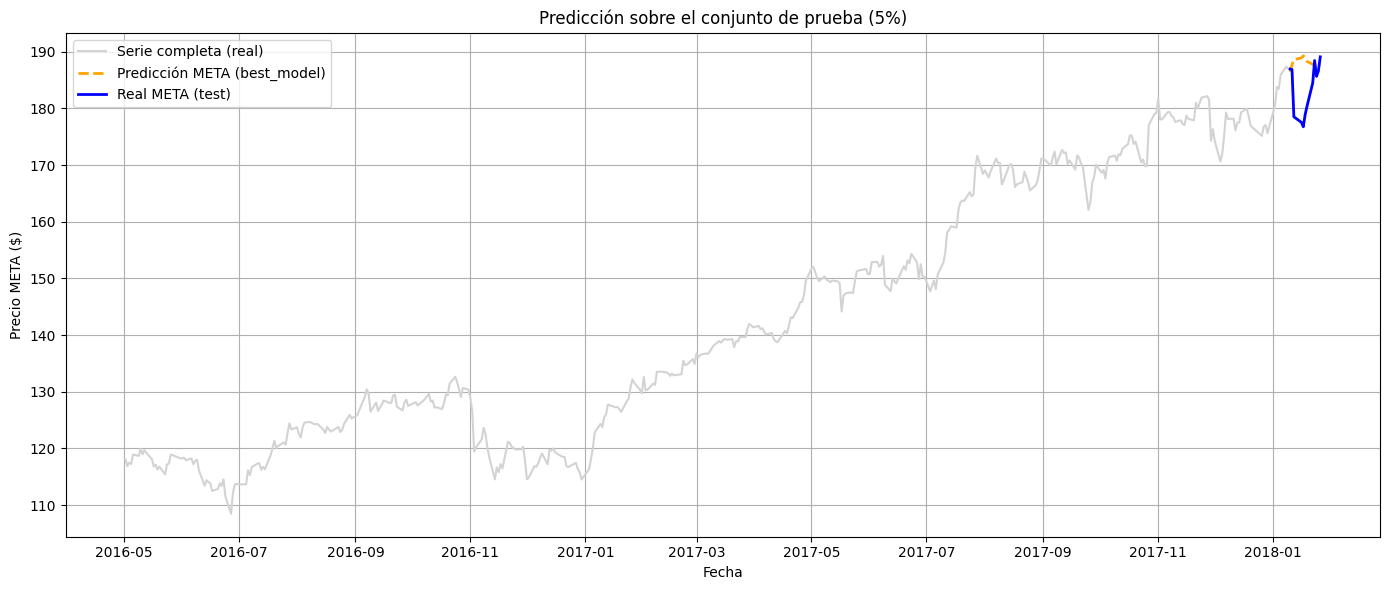

In [184]:
plt.figure(figsize=(14, 6))

# 1. Serie original (entera, en gris)
plt.plot(dataindex, output_data, label='Serie completa (real)', color='lightgray')

# 2. Predicción en el test (Ajustamos el rango de fechas)
plt.plot(date_test[n_back:], prediction, label='Predicción META (best_model)', linestyle='--', color='orange', linewidth=2)

# 3. Valores reales del test (Ajustamos el rango de fechas)
plt.plot(date_test[n_back:], close_test[n_back:], label='Real META (test)', color='blue', linewidth=2)

plt.title('Predicción sobre el conjunto de prueba (5%)')
plt.xlabel('Fecha')
plt.ylabel('Precio META ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Calculo de| métricas sobre el conjunto de prueba

In [185]:
y_true = close_test[n_back:]
y_pred = prediction

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"MAPE = {mape:.2f}%")

MAE  = 5.16
RMSE = 6.89
MAPE = 2.87%


### Prediccion de 10 dias hacia adelante

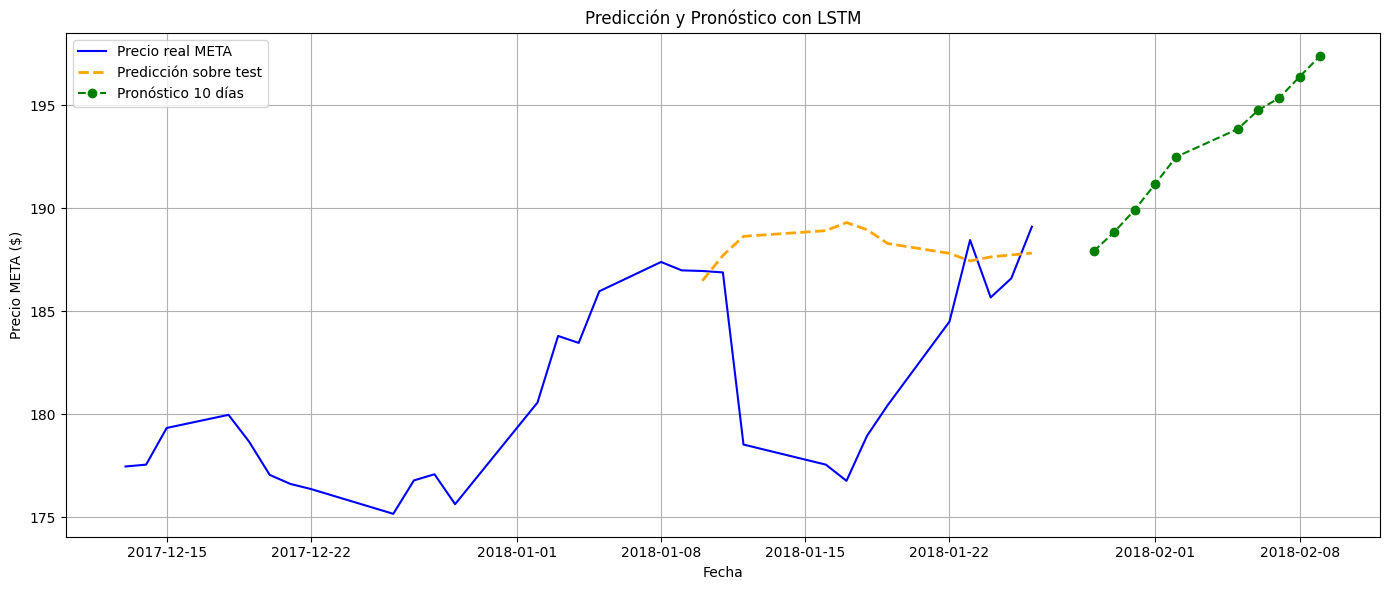

In [186]:
forecast_horizon = 10
n_back = 10

# Usamos los últimos n_back datos reales como semilla
seed_seq = close_data[-n_back:].copy()

# Pronóstico iterativo
future_preds = []
for _ in range(forecast_horizon):
    x_input = seed_seq.reshape((1, n_back, 1))
    yhat = model.predict(x_input, verbose=0)[0, 0]
    future_preds.append(yhat)
    seed_seq = np.append(seed_seq[1:], yhat)

# Últimos valores de prueba reales y predichos
y_true_test = close_test[n_back:]
y_pred_test = prediction

# Fechas de las predicciones del test
predicted_dates_test = date_test[n_back:]

# Fechas del forecast futuro
last_real_date = pd.to_datetime(meta.index[-1])
future_dates = pd.date_range(last_real_date + pd.Timedelta(days=1), periods=forecast_horizon, freq='B')

# Graficar
plt.figure(figsize=(14, 6))

# Últimos 30 días reales
plt.plot(meta.index[-30:], close_data[-30:], label='Precio real META', color='blue')

# Predicción sobre test
plt.plot(predicted_dates_test, y_pred_test, label='Predicción sobre test', linestyle='--', color='orange', linewidth=2)

# Pronóstico hacia adelante
plt.plot(future_dates, future_preds, label='Pronóstico 10 días', color='green', linestyle='--', marker='o')

# Personalización
plt.title('Predicción y Pronóstico con LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio META ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Random Forest

### Preprocesamiento

In [187]:
meta.index = pd.to_datetime(meta.index)

In [188]:
meta = meta.asfreq('B')
meta = meta.sort_index()

meta = meta.rename(columns={'Close': 'META'})

meta = meta.dropna()

meta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2016-05-02 to 2018-01-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   META    439 non-null    float64
dtypes: float64(1)
memory usage: 6.9 KB


### Partición de datos en entrenamiento y prueba

In [189]:
#Especificamos primeramente el porcentaje del corte 95%
split_percent = 0.95
split = int(split_percent * len(meta))

close_train = meta.iloc[:split].copy()
close_train.index = pd.to_datetime(close_train.index)

close_test = meta.iloc[split:].copy()
close_test.index = pd.to_datetime(close_test.index)

date_train = dataindex[:split]
date_test = dataindex[split:]

### Regresión con Random Forest

In [190]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 15
                )

forecaster.fit(y=close_train['META'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 416] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2025-05-11 23:10:49 
Last fit date: 2025-05-11 23:10:50 
Skforecast version: 0.11.0 
Python version: 3.11.12 
Forecaster id: None 

### Prediccion sobre test

In [191]:
steps = len(close_test)

# Realizar predicción
pred_rf = forecaster.predict(steps=steps)

pred_rf.index = close_test.index

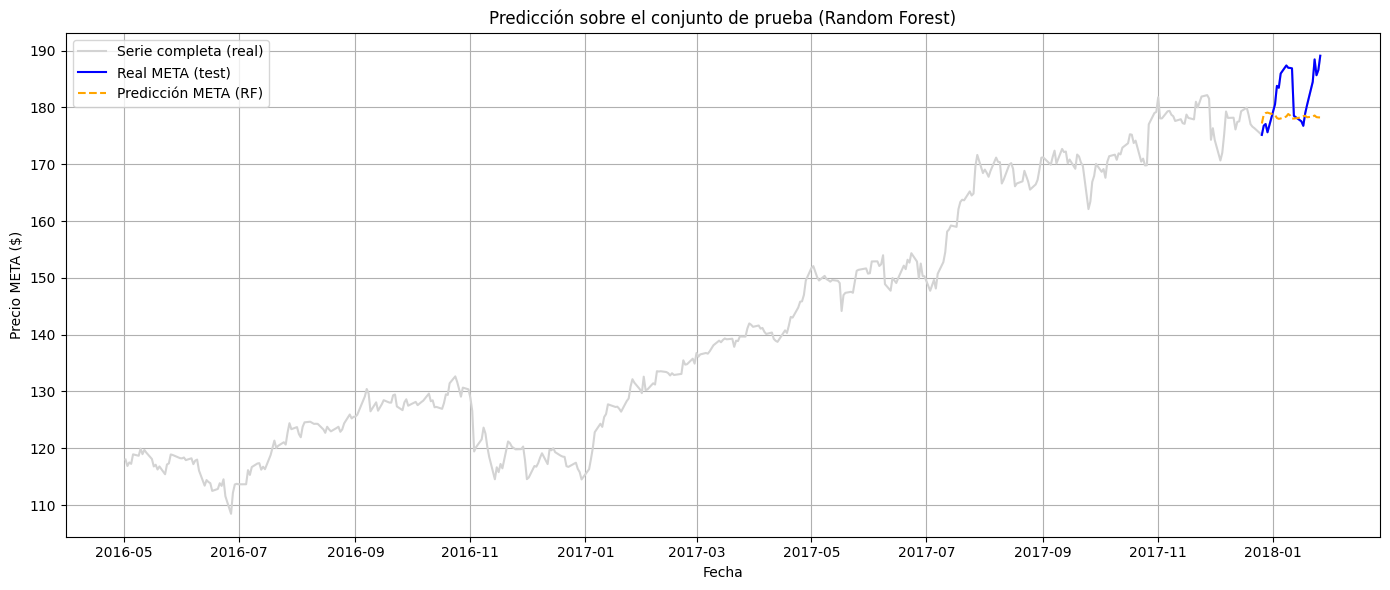

In [192]:
plt.figure(figsize=(14, 6))

# Serie completa
plt.plot(meta.index, meta['META'], label='Serie completa (real)', color='lightgray')

# Valores reales del test
plt.plot(close_test.index, close_test['META'], label='Real META (test)', color='blue')

# Predicción del modelo
plt.plot(pred_rf.index, pred_rf, label='Predicción META (RF)', linestyle='--', color='orange')

plt.title('Predicción sobre el conjunto de prueba (Random Forest)')
plt.xlabel('Fecha')
plt.ylabel('Precio META ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Metricas sobre prediccion en test

In [193]:
y_true = close_test['META']
y_pred = pred_rf  # generado con forecaster.predict(steps=...)


# Cálculo de métricas
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Resultados
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"MAPE = {mape:.2f}%")

MAE  = 5.12
RMSE = 6.15
MAPE = 2.76%


### Predicción de 10 dias hacia adelante

In [194]:
forecast_horizon = 10

forecast_rf = forecaster.predict(steps=forecast_horizon)


last_date = close_test.index[-1]

future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=10, freq='B')

forecast_rf.index = future_dates
print(forecast_rf.index)

DatetimeIndex(['2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-05', '2018-02-06', '2018-02-07',
               '2018-02-08', '2018-02-09'],
              dtype='datetime64[ns]', freq='B')


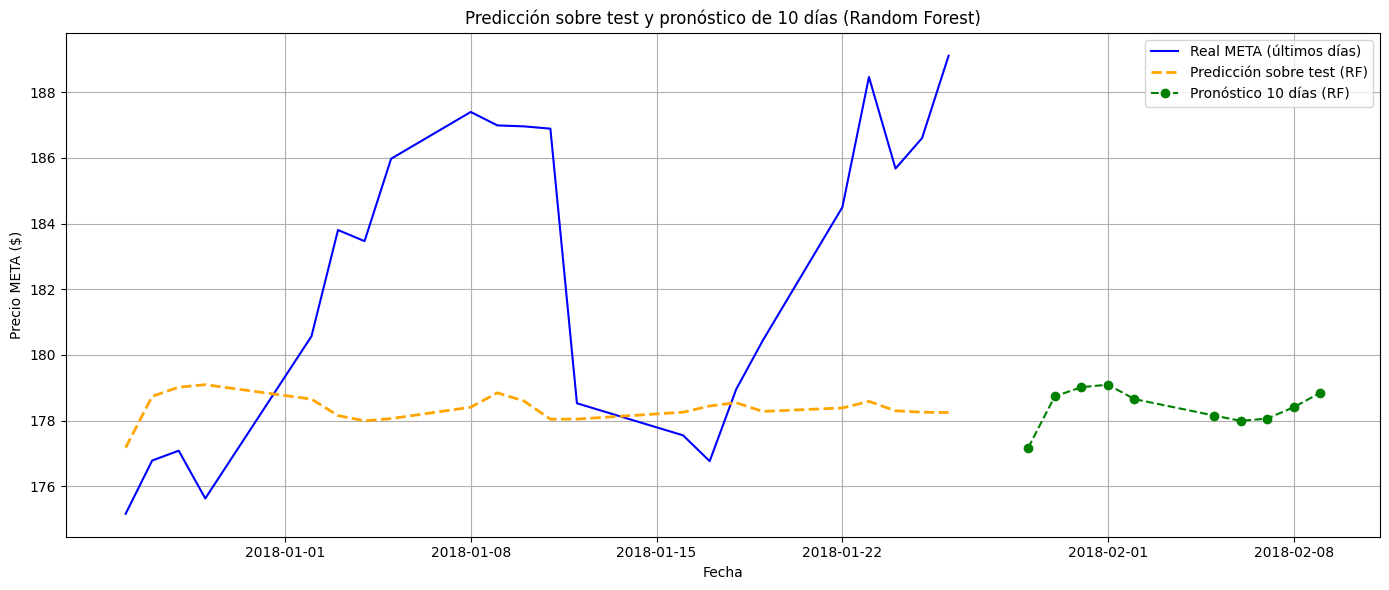

In [195]:
plt.figure(figsize=(14, 6))

# 1. Últimos 30 días reales del test
plt.plot(close_test.index[-30:], close_test['META'][-30:], label='Real META (últimos días)', color='blue')

# 2. Predicción sobre el test
plt.plot(pred_rf.index, pred_rf, label='Predicción sobre test (RF)', color='orange', linestyle='--', linewidth=2)

# 3. Pronóstico futuro
plt.plot(forecast_rf.index, forecast_rf, label='Pronóstico 10 días (RF)', color='green', linestyle='--', marker='o')

# Estética
plt.title('Predicción sobre test y pronóstico de 10 días (Random Forest)')
plt.xlabel('Fecha')
plt.ylabel('Precio META ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# R

### Instalación de Librerias

In [1]:
install.packages("dplyr")
install.packages("Rssa")
install.packages("dygraphs")
install.packages('tsfeatures', dependencies = TRUE)
install.packages("earth")
install.packages("yardstick")
install.packages("modeltime")
install.packages("parsnip")
install.packages("timetk")
install.packages("tidymodels")
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [118]:
library(Rssa)
library(quantmod)
library(dygraphs)
library(tsfeatures)
library(earth)
library(ggplot2)
library(tidyr)
library(stringr)
library(yardstick)
library(modeltime)
library(parsnip)
library(timetk)
library(tidymodels)
library(Metrics)


Attaching package: ‘Metrics’


The following objects are masked from ‘package:yardstick’:

    accuracy, mae, mape, mase, precision, recall, rmse, smape


The following object is masked from ‘package:forecast’:

    accuracy




### Importe de datos financieros

In [7]:
###Función de obtención de datos financieros de yahoo finance. Establecemos las fechas de estudio.
start<-format(as.Date("2016-05-01"),"%Y-%m-%d")
end<-format(as.Date("2018-01-28"),"%Y-%m-%d")

precios <-function(simbolo)  #para evitar posibles confusiones del código, omitimos las tildes.
{
  ##Obtener precios stocks de Yahoo Finance
  datos <- getSymbols(simbolo, auto.assign = FALSE, from=start, to=end)
  ## Elimar faltantes:
  datos<-na.omit(datos)
  ##mantener columnas con precios cierre y volumenes: columnas 4 y 5:
  datos <- datos[,4]
  ##Para hacer los datos accesibles en el global environment:
  assign(simbolo, datos, envir = .GlobalEnv)
}


precios("META")

In [8]:
##Juntamos los datos y renombramos:
Pr<-merge.xts(META)
head(Pr)
colnames(Pr) <- c("META")
head(Pr)
##Serie tiempo, gráfica interactiva
Precios<- dygraph(Pr[,c(1)], main="Precios ") %>%
  dyAxis("y", label = "Precios") %>%
  dyRangeSelector(dateWindow = c("2016-05-01", "2018-01-28"))%>%
  dyOptions(colors = RColorBrewer::brewer.pal(4,"Set1"))
Precios

           META.Close
2016-05-02     118.57
2016-05-03     117.43
2016-05-04     118.06
2016-05-05     117.81
2016-05-06     119.49
2016-05-09     119.24

             META
2016-05-02 118.57
2016-05-03 117.43
2016-05-04 118.06
2016-05-05 117.81
2016-05-06 119.49
2016-05-09 119.24

HTML widgets cannot be represented in plain text (need html)

In [9]:
# Podemos ver los 5 últimos datos redondeando hasta 3 decimales:
round(head(Pr, n = 5), 3)

             META
2016-05-02 118.57
2016-05-03 117.43
2016-05-04 118.06
2016-05-05 117.81
2016-05-06 119.49

### Indexado de fecha y visualización

In [10]:
xpr <- as.xts(Pr, dateFormat = "Date")
Pr_index <- fortify.zoo(xpr)
head(Pr_index)
nrow(Pr)

,Index,META
,<date>,<dbl>
1,2016-05-02,118.57
2,2016-05-03,117.43
3,2016-05-04,118.06
4,2016-05-05,117.81
5,2016-05-06,119.49
6,2016-05-09,119.24


[1] 439

## Modelo GAM

### Partición de datos de entrenamiento y prueba

In [42]:
#Partimos serie para train & test
h <- round(length(Pr)*0.05, digits = 0 )
h
Pr_tra <- Pr[1:(nrow(Pr) - h), ]
Pr_tes<- Pr[(nrow(Pr) - h + 1):nrow(Pr), ]

[1] 22

In [43]:
#Pasamos a formato data frame para poder generar los retrasos
Pr_df_tra<-as.data.frame(Pr_tra)
head(Pr_df_tra)

,META
,<dbl>
2016-05-02,118.57
2016-05-03,117.43
2016-05-04,118.06
2016-05-05,117.81
2016-05-06,119.49
2016-05-09,119.24


frequency,nperiods,seasonal_period,trend,spike,linearity,curvature,e_acf1,e_acf10,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0.9901344,1.737658e-09,19.22551,4.38829,0.7349023,1.041272,0.09337241,0.9927452,9.236512,-0.01550977,0.03439839,-0.4949165,0.2821558


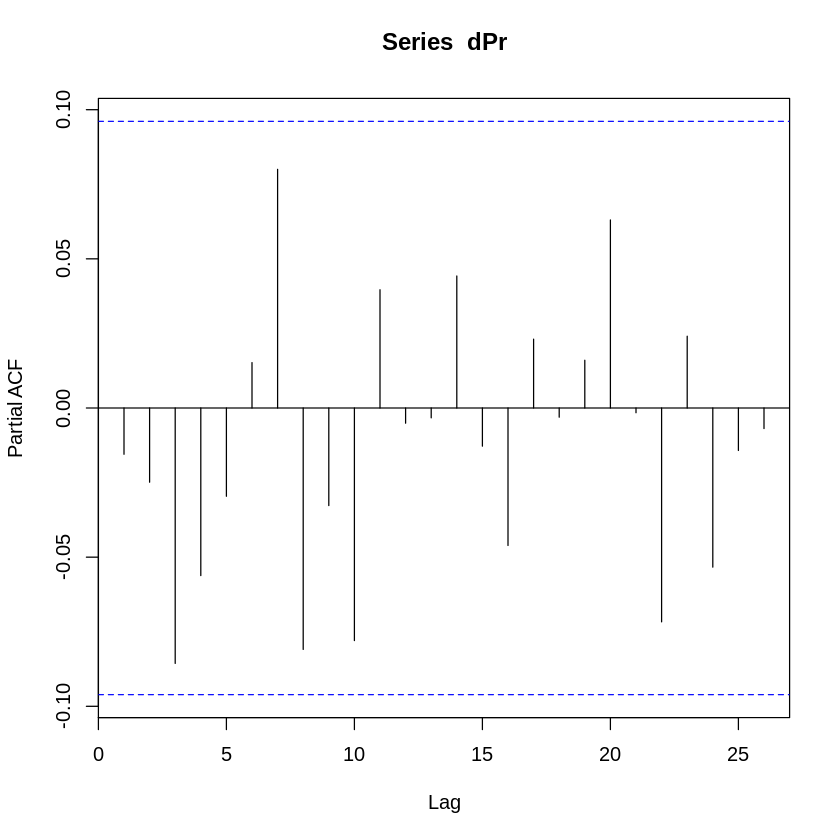

In [44]:
#Obteneomos features:
tsfeatures(Pr_df_tra)
#Visualiamos los rezagos autorregresivos, haciendo estacionaria la serie:
dPr<-diff(Pr_df_tra$META)%>% na.omit()
pacf(dPr)

linearity = 19.2 y curvature = 4.38: indican que la serie tiene comportamiento no lineal moderado, adecuado para MARS.

e_acf1 = 0.73: persistencia significativa → usa al menos 1–2 lags

diff1_acf10 = 0.034: baja autocorrelación residual después de una diferencia

In [45]:
#Generamos retrasos
Pr_all_train <- Pr_df_tra %>%
  mutate(
    l1 = lag(META, 1),
    l2 = lag(META, 2),
    l3 = lag(META, 3),
    l4 = lag(META, 4),
    l5 = lag(META, 5),
    l6 = lag(META, 6),
    l10 = lag(META, 10)
  ) %>%
  na.omit()

In [46]:
head(Pr_all_train)

,META,l1,l2,l3,l4,l5,l6,l10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-05-16,118.67,119.81,120.28,119.52,120.50,119.24,119.49,118.57
2016-05-17,117.35,118.67,119.81,120.28,119.52,120.50,119.24,117.43
2016-05-18,117.65,117.35,118.67,119.81,120.28,119.52,120.50,118.06
2016-05-19,116.81,117.65,117.35,118.67,119.81,120.28,119.52,117.81
2016-05-20,117.35,116.81,117.65,117.35,118.67,119.81,120.28,119.49
2016-05-23,115.97,117.35,116.81,117.65,117.35,118.67,119.81,119.24


In [47]:
Pr_all_train$trend = 1:nrow(Pr_all_train)
str(Pr_all_train)
head(Pr_all_train)
tail(Pr_all_train)

'data.frame':	407 obs. of  9 variables:
 $ META : num  119 117 118 117 117 ...
 $ l1   : num  120 119 117 118 117 ...
 $ l2   : num  120 120 119 117 118 ...
 $ l3   : num  120 120 120 119 117 ...
 $ l4   : num  120 120 120 120 119 ...
 $ l5   : num  119 120 120 120 120 ...
 $ l6   : num  119 119 120 120 120 ...
 $ l10  : num  119 117 118 118 119 ...
 $ trend: int  1 2 3 4 5 6 7 8 9 10 ...
 - attr(*, "na.action")= 'omit' Named int [1:10] 1 2 3 4 5 6 7 8 9 10
  ..- attr(*, "names")= chr [1:10] "2016-05-02" "2016-05-03" "2016-05-04" "2016-05-05" ...


,META,l1,l2,l3,l4,l5,l6,l10,trend
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2016-05-16,118.67,119.81,120.28,119.52,120.50,119.24,119.49,118.57,1
2016-05-17,117.35,118.67,119.81,120.28,119.52,120.50,119.24,117.43,2
2016-05-18,117.65,117.35,118.67,119.81,120.28,119.52,120.50,118.06,3
2016-05-19,116.81,117.65,117.35,118.67,119.81,120.28,119.52,117.81,4
2016-05-20,117.35,116.81,117.65,117.35,118.67,119.81,120.28,119.49,5
2016-05-23,115.97,117.35,116.81,117.65,117.35,118.67,119.81,119.24,6


,META,l1,l2,l3,l4,l5,l6,l10,trend
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2017-12-15,180.18,178.39,178.30,176.96,179.04,179.00,180.14,175.10,402
2017-12-18,180.82,180.18,178.39,178.30,176.96,179.04,179.00,171.47,403
2017-12-19,179.51,180.82,180.18,178.39,178.30,176.96,179.04,172.83,404
2017-12-20,177.89,179.51,180.82,180.18,178.39,178.30,176.96,176.06,405
2017-12-21,177.45,177.89,179.51,180.82,180.18,178.39,178.30,180.14,406
2017-12-22,177.20,177.45,177.89,179.51,180.82,180.18,178.39,179.00,407


In [48]:
#Separamos objetos para las secciones de entrenamiento con todos los features X_train:
x_train <- Pr_all_train %>%
  select(starts_with(c("l", "t")))
head(x_train)

,l1,l2,l3,l4,l5,l6,l10,trend
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2016-05-16,119.81,120.28,119.52,120.50,119.24,119.49,118.57,1
2016-05-17,118.67,119.81,120.28,119.52,120.50,119.24,117.43,2
2016-05-18,117.35,118.67,119.81,120.28,119.52,120.50,118.06,3
2016-05-19,117.65,117.35,118.67,119.81,120.28,119.52,117.81,4
2016-05-20,116.81,117.65,117.35,118.67,119.81,120.28,119.49,5
2016-05-23,117.35,116.81,117.65,117.35,118.67,119.81,119.24,6


### Entrenamiento del modelo

In [49]:
mars_mod <- earth(
  META ~ ., data=Pr_all_train, pmethod="backward" )

In [50]:
print(mars_mod)

Selected 2 of 3 terms, and 1 of 8 predictors
Termination condition: RSq changed by less than 0.001 at 3 terms
Importance: l1, l2-unused, l3-unused, l4-unused, l5-unused, l6-unused, ...
Number of terms at each degree of interaction: 1 1 (additive model)
GCV 2.602851    RSS 1043.801    GRSq 0.9945267    RSq 0.9945805


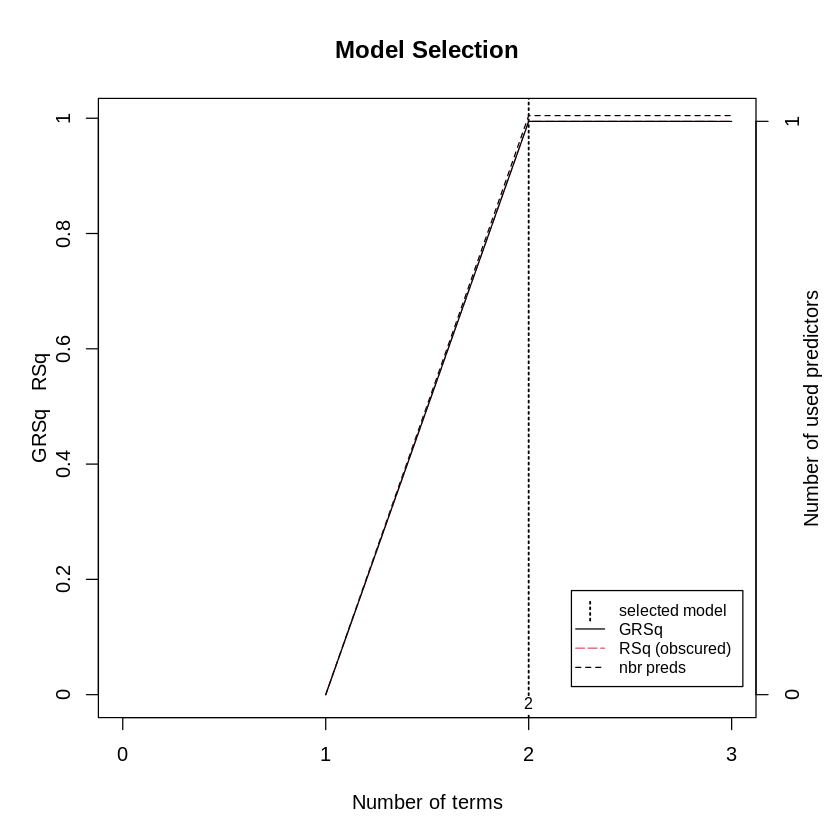

In [51]:
plot(mars_mod, which = 1)

### Predicción sobre test

In [52]:
Pr_test2 <- as.data.frame(Pr_tes)

# Generamos lags exactamente como en el entrenamiento
Pr_all_test <- Pr_test2 %>%
  rename(META = META) %>%
  mutate(
    l1 = lag(META, 1),
    l2 = lag(META, 2),
    l3 = lag(META, 3),
    l4 = lag(META, 4),
    l5 = lag(META, 5),
    l6 = lag(META, 6),
    l10 = lag(META, 10),
    trend = 1:n()
  ) %>%
  na.omit()

head(Pr_all_test)
str(Pr_all_test)

,META,l1,l2,l3,l4,l5,l6,l10,trend
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2018-01-10,187.84,187.87,188.28,186.85,184.33,184.67,181.42,175.99,11
2018-01-11,187.77,187.84,187.87,188.28,186.85,184.33,184.67,177.62,12
2018-01-12,179.37,187.77,187.84,187.87,188.28,186.85,184.33,177.92,13
2018-01-16,178.39,179.37,187.77,187.84,187.87,188.28,186.85,176.46,14
2018-01-17,177.60,178.39,179.37,187.77,187.84,187.87,188.28,181.42,15
2018-01-18,179.80,177.60,178.39,179.37,187.77,187.84,187.87,184.67,16


'data.frame':	12 obs. of  9 variables:
 $ META : num  188 188 179 178 178 ...
 $ l1   : num  188 188 188 179 178 ...
 $ l2   : num  188 188 188 188 179 ...
 $ l3   : num  187 188 188 188 188 ...
 $ l4   : num  184 187 188 188 188 ...
 $ l5   : num  185 184 187 188 188 ...
 $ l6   : num  181 185 184 187 188 ...
 $ l10  : num  176 178 178 176 181 ...
 $ trend: int  11 12 13 14 15 16 17 18 19 20 ...
 - attr(*, "na.action")= 'omit' Named int [1:10] 1 2 3 4 5 6 7 8 9 10
  ..- attr(*, "names")= chr [1:10] "2017-12-26" "2017-12-27" "2017-12-28" "2017-12-29" ...


In [53]:
# Extraemos solo los predictores (lags + tendencia) para la predicción
x_test <- Pr_all_test %>%
  select(starts_with("l"), trend)

head(x_test)

,l1,l2,l3,l4,l5,l6,l10,trend
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2018-01-10,187.87,188.28,186.85,184.33,184.67,181.42,175.99,11
2018-01-11,187.84,187.87,188.28,186.85,184.33,184.67,177.62,12
2018-01-12,187.77,187.84,187.87,188.28,186.85,184.33,177.92,13
2018-01-16,179.37,187.77,187.84,187.87,188.28,186.85,176.46,14
2018-01-17,178.39,179.37,187.77,187.84,187.87,188.28,181.42,15
2018-01-18,177.60,178.39,179.37,187.77,187.84,187.87,184.67,16


In [54]:
# Usamos Pr_all_test para que esté alineado con x_test
y_test <- Pr_all_test %>%
  select(META)

dim(y_test)
head(y_test)

[1] 12  1

,META
,<dbl>
2018-01-10,187.84
2018-01-11,187.77
2018-01-12,179.37
2018-01-16,178.39
2018-01-17,177.60
2018-01-18,179.80


In [55]:
pred_mars = predict(mars_mod, x_test)[,1]
str(pred_mars)

 num [1:12] 180 180 180 180 179 ...


In [56]:
Pr_test3 <- Pr_all_test %>%
  mutate(
    pred_mars = predict(mars_mod, newdata = x_test)[,1],
  )

head(Pr_test3)
str(Pr_test3)

,META,l1,l2,l3,l4,l5,l6,l10,trend,pred_mars
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2018-01-10,187.84,187.87,188.28,186.85,184.33,184.67,181.42,175.99,11,180.3095
2018-01-11,187.77,187.84,187.87,188.28,186.85,184.33,184.67,177.62,12,180.3095
2018-01-12,179.37,187.77,187.84,187.87,188.28,186.85,184.33,177.92,13,180.3095
2018-01-16,178.39,179.37,187.77,187.84,187.87,188.28,186.85,176.46,14,179.6182
2018-01-17,177.60,178.39,179.37,187.77,187.84,187.87,188.28,181.42,15,178.6363
2018-01-18,179.80,177.60,178.39,179.37,187.77,187.84,187.87,184.67,16,177.8448


'data.frame':	12 obs. of  10 variables:
 $ META     : num  188 188 179 178 178 ...
 $ l1       : num  188 188 188 179 178 ...
 $ l2       : num  188 188 188 188 179 ...
 $ l3       : num  187 188 188 188 188 ...
 $ l4       : num  184 187 188 188 188 ...
 $ l5       : num  185 184 187 188 188 ...
 $ l6       : num  181 185 184 187 188 ...
 $ l10      : num  176 178 178 176 181 ...
 $ trend    : int  11 12 13 14 15 16 17 18 19 20 ...
 $ pred_mars: num  180 180 180 180 179 ...
 - attr(*, "na.action")= 'omit' Named int [1:10] 1 2 3 4 5 6 7 8 9 10
  ..- attr(*, "names")= chr [1:10] "2017-12-26" "2017-12-27" "2017-12-28" "2017-12-29" ...


In [57]:
Pr_test3 <- Pr_test3 %>%
  tibble::rownames_to_column(var = "fecha")

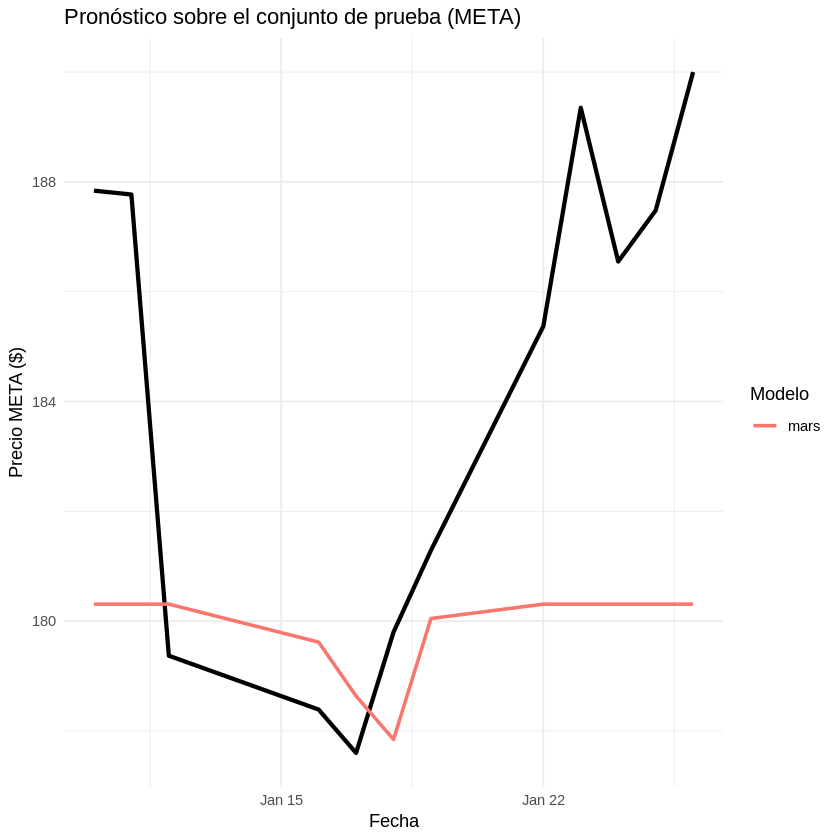

In [58]:
Pr_test3 %>%
  select(fecha, META, starts_with("pred")) %>%
  gather(key = "model", value = "forecast", -fecha, -META) %>%
  mutate(model = str_remove(model, "pred_")) %>%
  ggplot(aes(x = as.Date(fecha))) +
  geom_line(aes(y = META), color = "black", linewidth = 1.2) +
  geom_line(aes(y = forecast, color = model), linewidth = 1) +
  labs(title = "Pronóstico sobre el conjunto de prueba (META)",
       x = "Fecha", y = "Precio META ($)", color = "Modelo") +
  theme_minimal()

### Metricas sobre predicción en test

In [59]:
yardstick::metrics(Pr_test3, truth = META, estimate = pred_mars)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5.8651241
rsq,standard,0.4270133
mae,standard,4.8827857


In [60]:
mape_val <- mean(abs((Pr_test3$META - Pr_test3$pred_mars) / Pr_test3$META)) * 100
cat("MAPE =", round(mape_val, 2), "%")

MAPE = 2.61 %


### Predicción de 10 dias hacia adelante

In [61]:
#Preparacion de datos
Pr_index <- Pr %>%
  tk_tbl() %>%
  rename(.date = index, .value = META)

Pr_index <- Pr %>%
  zoo::fortify.zoo() %>%
  as_tibble() %>%
  rename(.date = Index, .value = META)


In [62]:
# Creación de modelo
mars_spec <- mars(mode = "regression") %>%
  set_engine("earth")

mars_fit <- mars_spec %>%
  fit(.value ~ as.numeric(.date), data = Pr_index)

In [63]:
# Poner en el model table
model_tbl <- modeltime_table(mars_fit)

In [64]:
glimpse(Pr_index)

Rows: 439
Columns: 2
$ .date  <date> 2016-05-02, 2016-05-03, 2016-05-04, 2016-05-05, 2016-05-06, 20…
$ .value <dbl> 118.57, 117.43, 118.06, 117.81, 119.49, 119.24, 120.50, 119.52,…


Warning message:
“✖ Expecting the following names to be in the data frame: .conf_hi, .conf_lo.
ℹ Proceeding with '.conf_interval_show = FALSE' to visualize the forecast without confidence intervals.
Alternatively, try using `modeltime_calibrate()` before forecasting to add confidence intervals.”


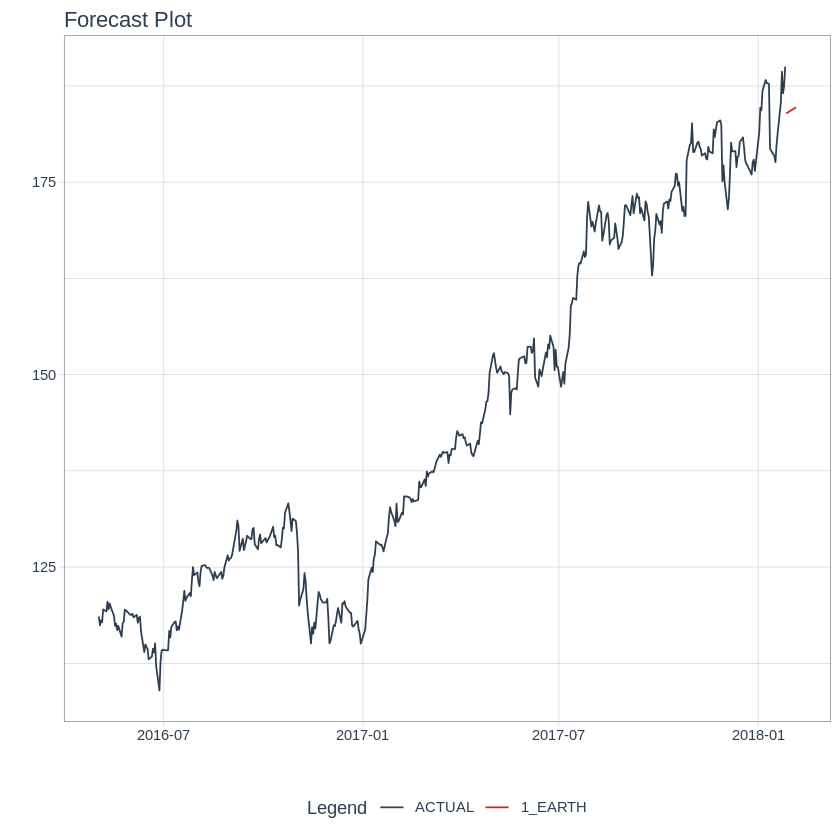

In [65]:
forecast_tbl <- model_tbl %>%
  modeltime_forecast(h = "10 days", actual_data = Pr_index)

plot_modeltime_forecast(
  .data = forecast_tbl,
  .legend_max_width = 25,
  .interactive = FALSE
)

In [67]:
forecast_plot <- forecast_tbl %>%
  filter(.key == "prediction") %>%     # <-- esta es la clave correcta
  select(.index, .value) %>%
  rename(fecha = .index, forecast_mars = .value) %>%
  mutate(real = NA, tipo = "Pronóstico futuro")

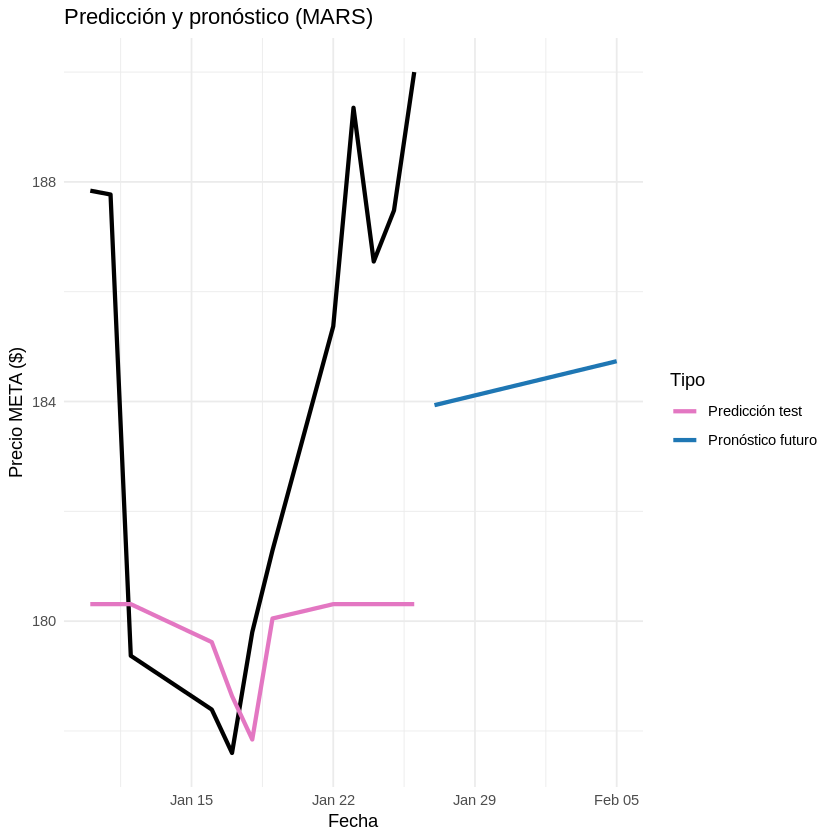

In [68]:
Pr_test_plot <- Pr_test3 %>%
  select(fecha, real = META, pred_mars) %>%
  mutate(
    fecha = as.Date(fecha),
    tipo = "Predicción test"
  ) %>%
  rename(forecast_mars = pred_mars)

plot_data <- bind_rows(Pr_test_plot, forecast_plot)

ggplot(plot_data, aes(x = fecha)) +
  geom_line(aes(y = real), color = "black", size = 1.2, na.rm = TRUE) +
  geom_line(aes(y = forecast_mars, color = tipo), size = 1.2) +
  scale_color_manual(values = c("Predicción test" = "#e377c2", "Pronóstico futuro" = "#1f77b4")) +
  labs(
    title = "Predicción y pronóstico (MARS)",
    x = "Fecha", y = "Precio META ($)", color = "Tipo"
  ) +
  theme_minimal()


## Modelo SAS

### Funciones manuales

In [103]:
##Hankelización:
UniHankel=function(Y,L){
  k<-length(Y)-L+1
  outer((1:L), (1:k), function(x,y) Y[(x+y-1)])
}

In [104]:
##Función SVD
SVD<- function(Y,L){
  X<-UniHankel(Y,L)
  svd(X)
}

In [106]:
###W-correlation
W.corr<-function(Yt,L, groups){
  m<-length(groups); w.corr<-diag(m)
  N<-length(Yt)
  w<-((N+1)-abs((N+1)/2-L)-abs((N+1)/2-1:N)-
    abs(abs((N+1)/2-L)-abs((N+1)/2-1:N)))/2
wcorr<-function(i,j){
  Y1<-SSA.Rec(Yt,L,groups[[i]])$Approximation #Added $ before Approximation to extract the Approximation component.
  sum(w*Y1*Y2)/sqrt(sum(w*Y1^2)*sum(w*Y2^2))}
for (i in 1:(m-1)){
  for (j in (i+1):m){
    w.corr[i,j]=w.corr[j,i]=wcorr(i,j)}}
rownames(w.corr)<-colnames(w.corr)<-groups
w.corr
}

In [107]:
###Plotting Images w.corr
Plt.Img<-function(x){
  min<-min(x)
  max<-max(x)
  yLabels<-rownames(x)
  xLabels<-colnames(x)
  if( is.null (xLabels)){
    xLabels <- c(1:ncol(x))
  }
  if (is.null(yLabels)){
    yLabels <- c(1:nrow(x))
  }
  layout(matrix(data=c(1,2), nrow=1, ncol=2),
         widths=c(4,1), heights=c(1,1))
  ColorRamp<-gray( seq(1,0, length=20))
  ColorLevels<-seq(min, max, length=length(ColorRamp))
                  par(mar=c(3,5,2.5,2))
                  image(1:length(xLabels), 1:length(yLabels),
                        t(x), col=colorRamp, xlab="",
                        ylab = "", axes=FALSE, zlim=c(min, max))
                  title(main=c("Image Plot"))
                  axis(BELOW<-1, at=1:length(xLabels),
                       labels=xLabels, cex.axis=0.7)
                  axis(LEFT<-2, at=1:length(yLabels),
                       labels=yLabels, las=HORIZONTAL<-1,
                       cex.axis=0.7)
                  box()
                  par(mar=c(3,2.5, 2.5,2))
                  image(1, ColorLevels,
                        matrix(data=ColorLevels, ncol=length(ColorLevels), nrow=1),
                        col=colorRamp,
                        xlab="", ylab="",
                        xaxt="n")
                  layout(1)
}


In [108]:

##Singular Values graph
Sing.plt<-function(Y,L){
  lambda<-log(SVD(Y,L)$d)
  d<-length(lambda)
  win<-1:d
  plot.new()
  plot.window(xlim=range(win), ylim=range(lambda))
  usr=par("usr")
  rect(usr[1], usr[3], usr[2], usr[4])
  lines(win, lambda, lwd=2)
  points(win, lambda, pch=21, bg="gray")
  axis(1)
  axis(2)
  box()
  title(xlab="Number")
  title(ylab="Log.Singular Values")}

### Obtencion de datos

In [158]:
options(digits=3)
options(warn=-1)

#Obtención DATOS:
META<-getSymbols("META", from="2016-05-01", to="2018-01-28",auto.assign = FALSE)
META<-na.omit(META)
META<-META[,4]
head(META)
colnames(META)<-c("META")

           META.Close
2016-05-02        119
2016-05-03        117
2016-05-04        118
2016-05-05        118
2016-05-06        119
2016-05-09        119

An xts object on 2016-05-02 / 2018-01-26 containing: 
  Data:    double [439, 1]
  Columns: META
  Index:   Date [439] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2025-05-12 02:58:58"


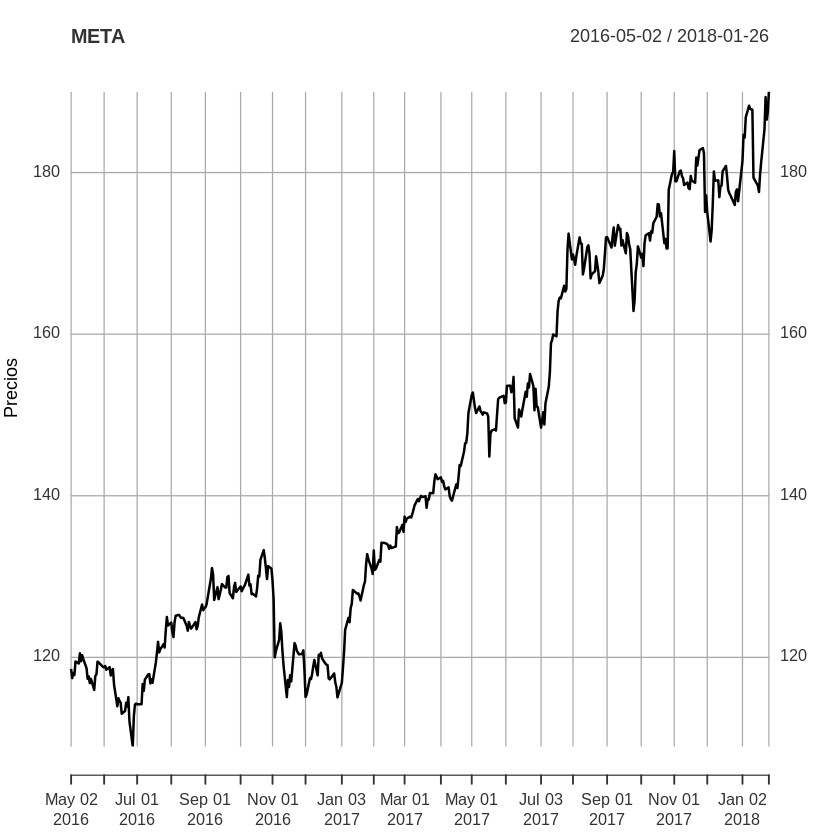

In [159]:
plot(META, ylab="Precios")
str(META)

### Preprocesamiento

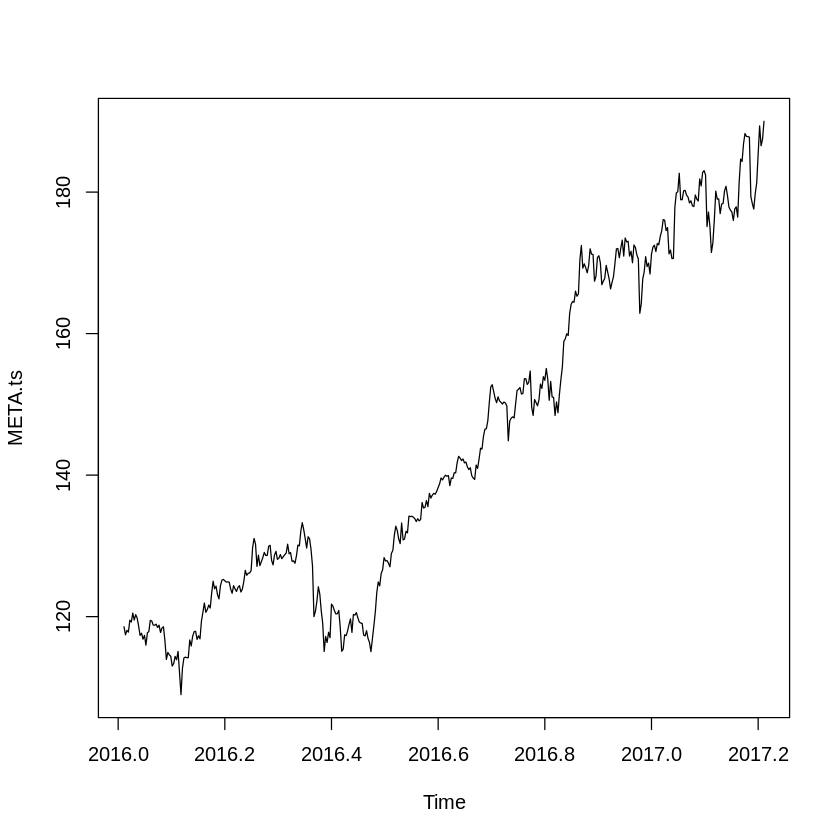

In [160]:
# Un paso importante que hay que hacer, es pasar los datos de formato xts a ts, que es el formato que emplea SSA. para ello, pasamos primero a data frame
# y luego a ts.
META <- data.frame(date=index(META), coredata(META))
META1<-META$META
##pasamos a ts
META.ts<-ts(META1, start=c(2016,05), frequency = 365)
plot(META.ts)

### Particion de datos en entrenamiento y prueba

In [190]:
#Partimos serie para train & test
h <- round(length(META.ts) * 0.05, digits = 0)
h

[1] 22

In [193]:
#Una vez creada la ventana h, generamos los conjuntos de entrenamiento y prueba.
#train <- META.ts[1:(length(META.ts) - h)]
train.ts <- ts(META.ts[1:(length(META.ts) - h)],
               start = start(META.ts),
               frequency = frequency(META.ts))

#test  <- META.ts[(length(META.ts) - h + 1):length(META.ts)]
test.ts <- ts(META.ts[(length(META.ts) - h + 1):length(META.ts)],
              start = time(META.ts)[(length(META.ts) - h + 1)],
              frequency = frequency(META.ts))


length(train.ts) / length(META.ts)
length(test.ts) / length(META.ts)

[1] 0.95

[1] 0.0501

### Funcion SSA

In [195]:
#s1<-ssa(train.ts)
s1 <- ssa(train.ts)
s1


Call:
ssa(x = train.ts)

Series length: 417,	Window length: 209,	SVD method: eigen
Special triples:  0

Computed:
Eigenvalues: 50,	Eigenvectors: 50,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 0.0864 MiB

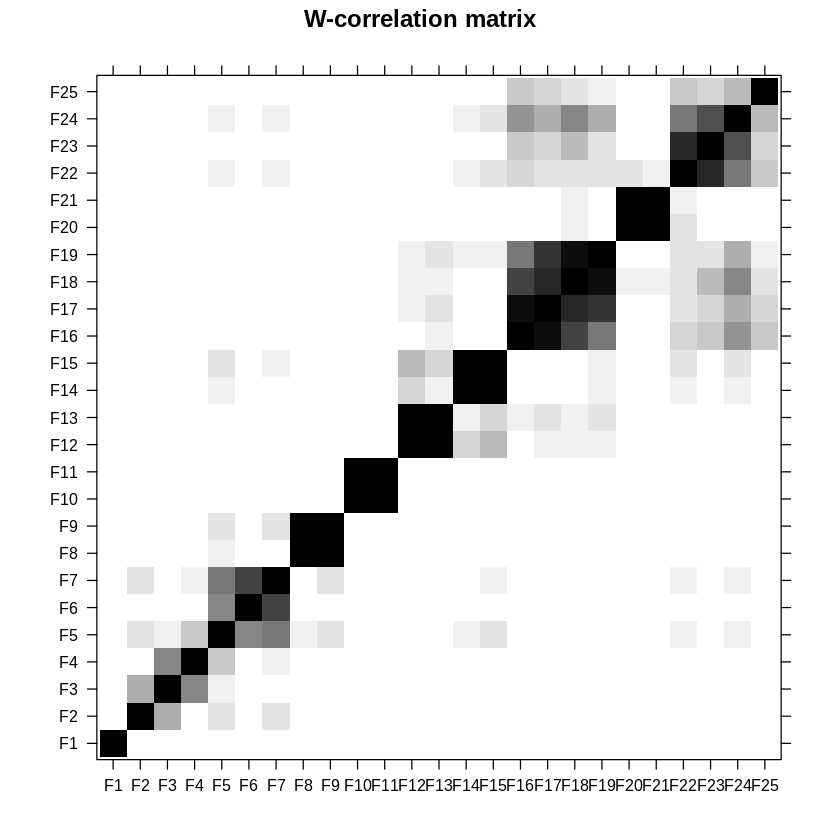

In [196]:
##Reconstrucción: empleamos las herramientas visuales para la selección.
wplot<-wcor(s1, group=1:25)
plot(wplot)

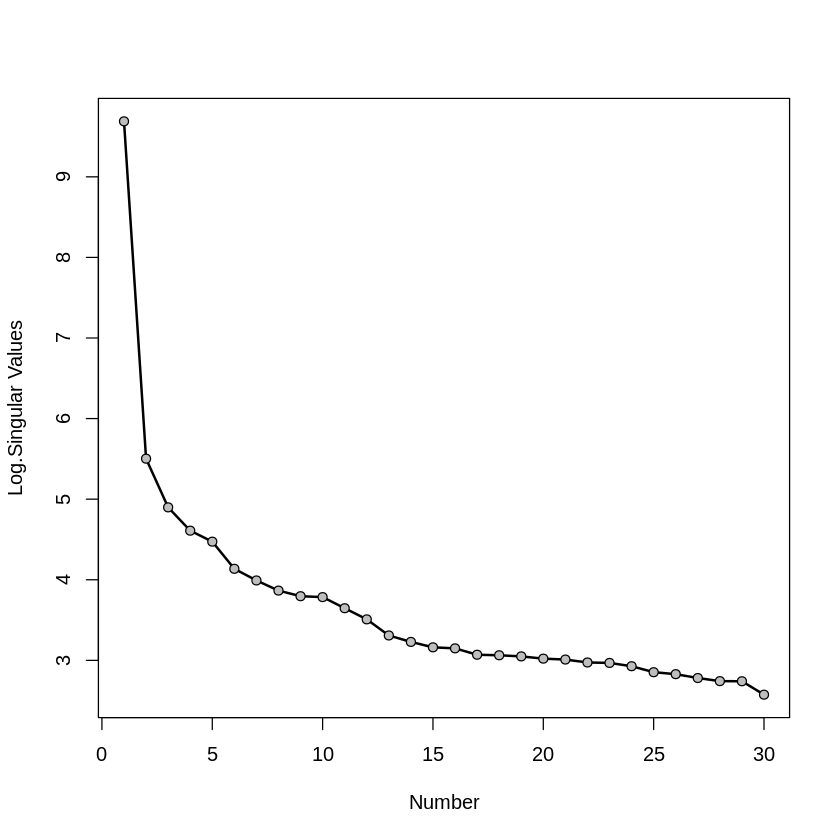

In [197]:
#Tambien generamos la scree-plot.
Sing.plt<-function(Y,L){
  lambda<-log(SVD(Y,L)$d)
  d<-length(lambda)
  win<-1:d
  plot.new()
  plot.window(xlim=range(win), ylim=range(lambda))
  usr=par("usr")
  rect(usr[1], usr[3], usr[2], usr[4])
  lines(win, lambda, lwd=2)
  points(win, lambda, pch=21, bg="gray")
  axis(1)
  axis(2)
  box()
  title(xlab="Number")
  title(ylab="Log.Singular Values")}


Sing.plt(META.ts, 30)

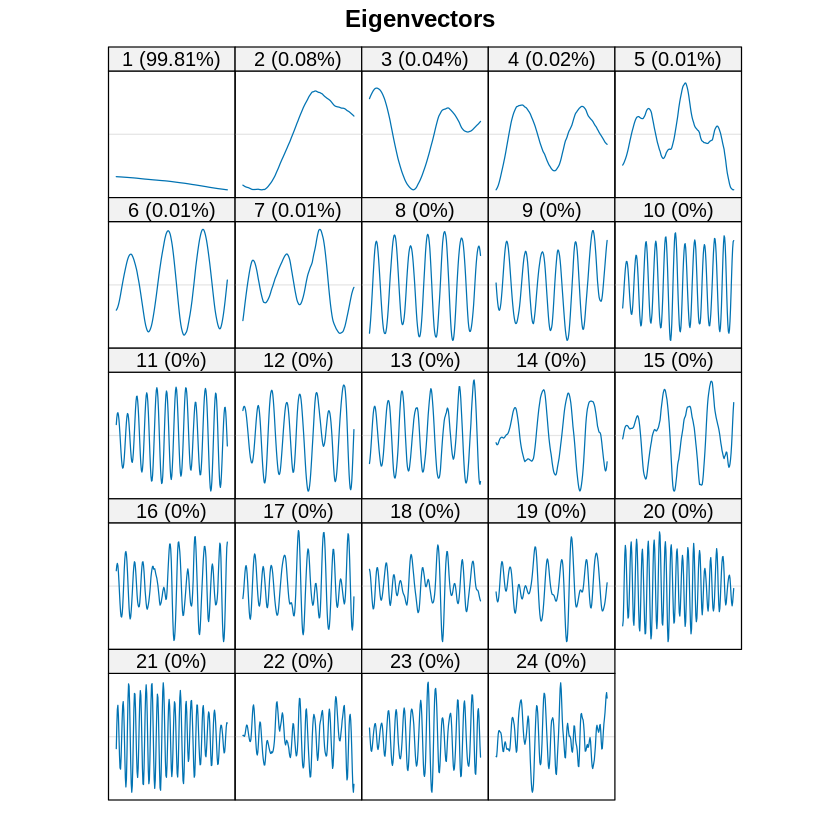

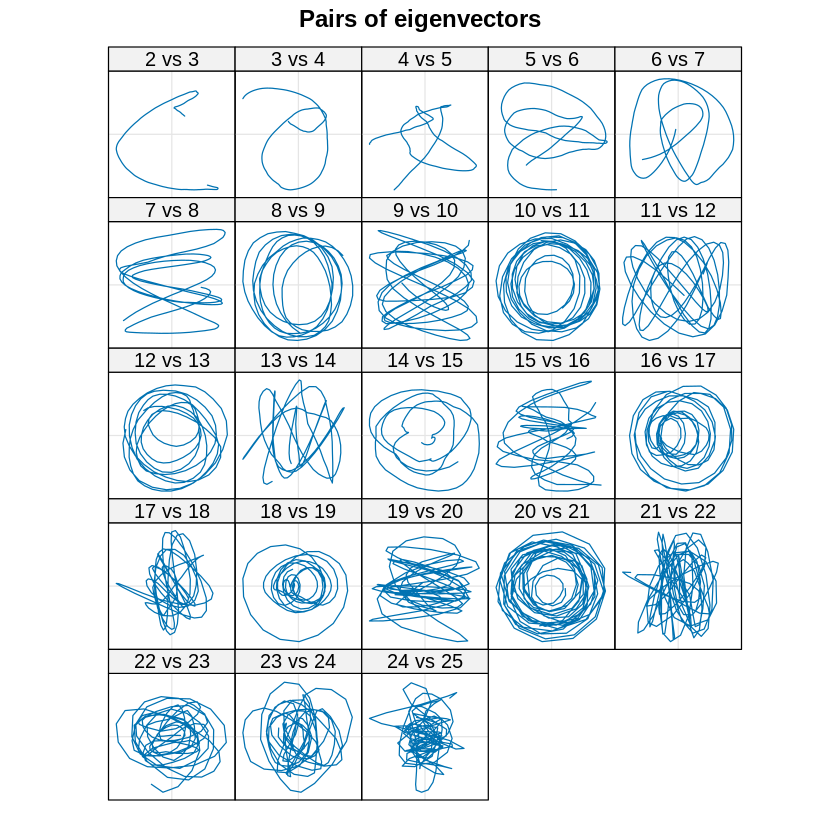

In [198]:
plot(s1, type="vectors", idx=1:24)
plot(s1, type= "paired", idx=2:24, plot.contrib = FALSE)

Scree Plot (Log-Singular Values):

- Podemos ver que las componentes más significativas en términos de varianza están en los primeros pocos vectores (especialmente el primero).


Eigenvectors:
- Tendencia (Trend): Se observa que los vectores 1 y 2 representan muy probablemente la tendencia (suaves, de baja frecuencia).
- Estacionalidad (Seasonality): Los pares 3–4, 5–6, 7–8, y 9–10 presentan oscilaciones sinusoidales claras y son buenos candidatos para representar componentes estacionales.


W-Correlation Matrix:

- Confirma agrupamientos visibles (alta correlación entre pares estacionales y entre los primeros vectores).

### Reconstruccion

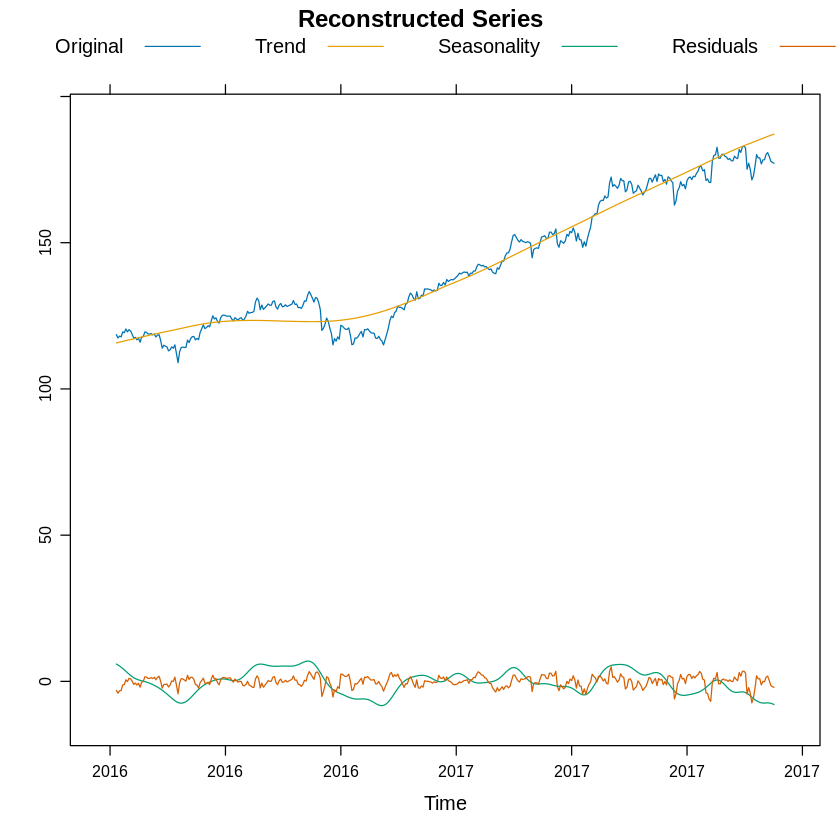

In [199]:
r <- reconstruct(s1, groups = list(
  Trend = c(1, 2),
  Seasonality = c(3, 4, 5, 6, 7, 8, 9, 10)
))

plot(r, add.residuals = TRUE, add.original = TRUE,
     plot.method = "xyplot", superpose = TRUE,
     auto.key = list(columns = 4))

### Predicción sobre test

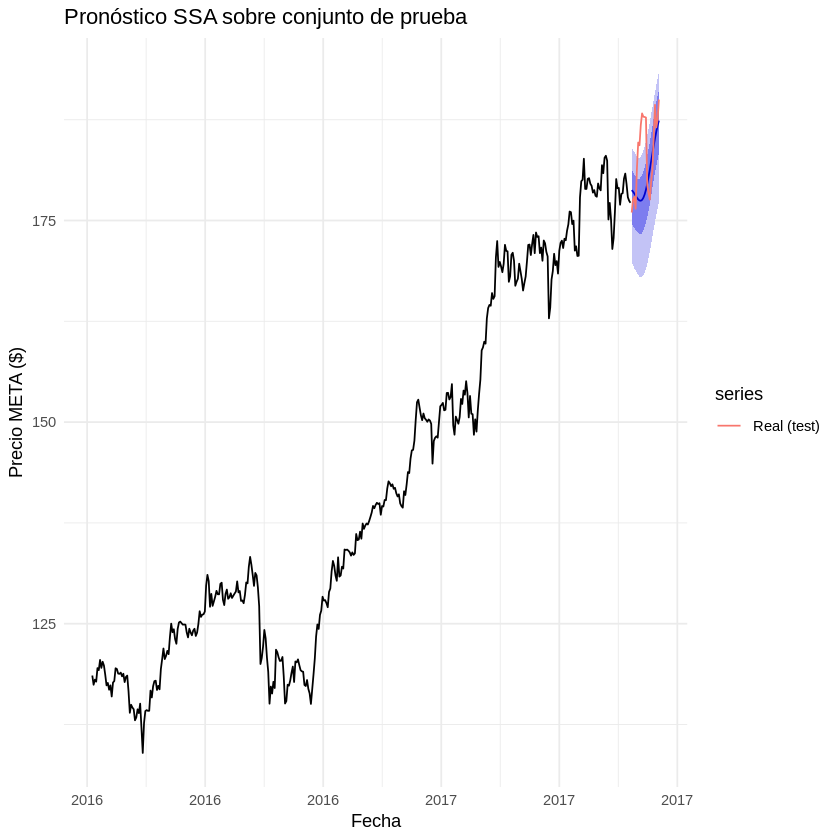

In [200]:
pronostico1 <- forecast(
  s1,
  groups = list(c(1:10)),
  len = length(test),
  method = "recurrent",
  interval = "prediction",
  level = c(0.8, 0.99),
  only.new = TRUE
)


# Convertimos test a serie de tiempo alineada al final del entrenamiento
test.ts <- ts(test, start = end(train.ts)[1] + end(train.ts)[2] / 365, frequency = 365)

# Graficamos el pronóstico sobre el test
autoplot(pronostico1, series = "Pronóstico test") +
  autolayer(test.ts, series = "Real (test)") +
  ggtitle("Pronóstico SSA sobre conjunto de prueba") +
  xlab("Fecha") + ylab("Precio META ($)") +
  theme_minimal()

### Metricas sobre predicción en test

In [201]:
# Calcular métricas
mae_val <- mae(test, pred)
rmse_val <- rmse(test, pred)
mape_val <- mape(test, pred) * 100  # Para expresarlo en porcentaje

# Mostrar resultados
cat("MAE  =", round(mae_val, 2), "\n")
cat("RMSE =", round(rmse_val, 2), "\n")
cat("MAPE =", round(mape_val, 2), "%\n")

MAE  = 4.16 
RMSE = 5.44 
MAPE = 2.24 %


### Prediccion de 10 dias hacia adelante

In [202]:
# pronóstico futuro
pronostico2 <- forecast(
  s1,
  groups = list(c(1:10)),
  len = 10,
  method = "recurrent",
  interval = "prediction",
  level = c(0.8, 0.99),
  only.new = TRUE
)

In [203]:
test.ts <- ts(test, start = end(train.ts)[1] + end(train.ts)[2] / 365, frequency = 365)

# Creamos fechas para el pronóstico futuro
future_start <- end(train.ts)[1] + end(train.ts)[2] / 365 + length(test) / 365
future.ts <- ts(pronostico2$mean, start = future_start, frequency = 365)

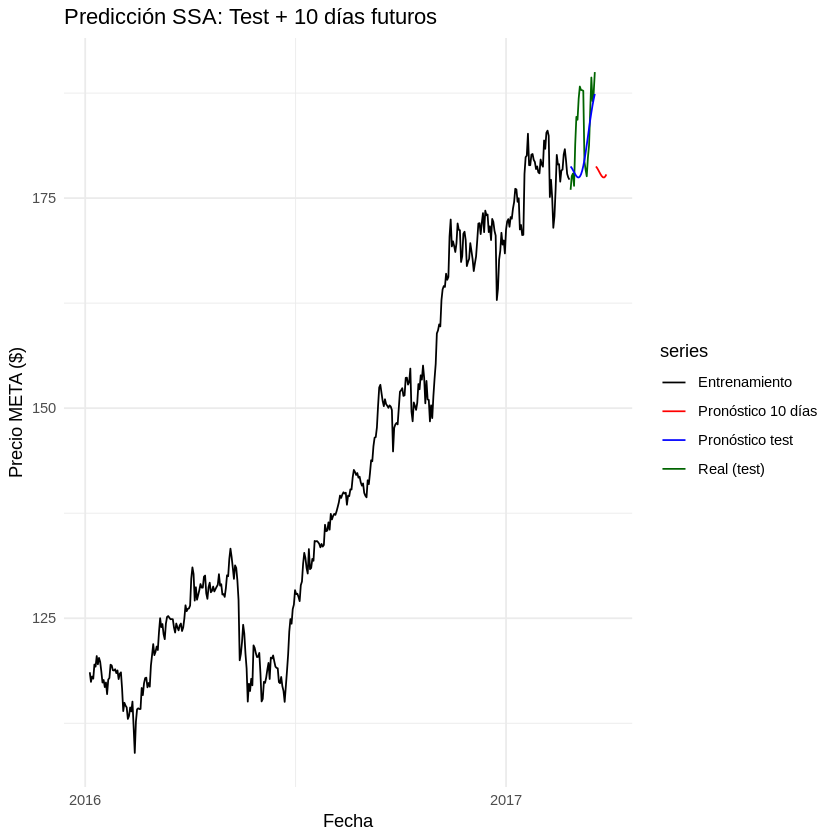

In [204]:
autoplot(train.ts, series = "Entrenamiento") +
  autolayer(test.ts, series = "Real (test)") +
  autolayer(pronostico1$mean, series = "Pronóstico test", PI = FALSE) +
  autolayer(future.ts, series = "Pronóstico 10 días", PI = FALSE) +
  ggtitle("Predicción SSA: Test + 10 días futuros") +
  xlab("Fecha") + ylab("Precio META ($)") +
  theme_minimal() +
  scale_color_manual(values = c("black", "red", "blue", "darkgreen"))